# Machine Learning Exercise 4-3
## Question 3 : Face Clustering on Olivetti Dataset using kmeans
By Gholamreza Dar

https://gholamrezadar.ir/

Feb 2022


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML_HW04.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_style("dark")
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

## Functions



In [ ]:
class GHDKmeans():
  def __init__(self, k, tol, max_iter):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
    self.X = None
    self.y_pred = None
    self.centers = None
    self.C = None

  def fit(self, X, centers):
    """X: (m,n) input matrix"""
    self.X = X
    self.centers = centers
    # Do KMeans
    for i in range(self.max_iter):
      # Find the distance between each point and each center
      distances = []
      for idx, center in enumerate(self.centers):
        distances.append(np.linalg.norm(X-center, axis=1))
      nearest_cluster = np.argmin(distances, axis=0)

      # Assign points to clusters
      self.y_pred = nearest_cluster

      # Re-calculate centers
      new_centers = np.zeros_like(centers)
      for idx, center in enumerate(self.centers):
        if len(X[self.y_pred == idx]) == 0:
          new_centers[idx] = centers[idx]
        else:
          new_centers[idx] = X[self.y_pred == idx].mean(axis=0)

      # print(i, self.sse())
      
      # Tolerance check
      if np.sum(np.abs((new_centers-self.centers)))<self.tol:
        print(f"Tolerance reached on iteration {i} ,{np.sum(np.abs((new_centers-self.centers)/self.centers*100))}")
        break

      self.centers = new_centers
      # print(self.centers)

  def accuracy(self, y):
    return max((y==self.y_pred).sum()/len(y), 1.0-(y==self.y_pred).sum()/len(y))
    
  def predict(self):
    # Return the Clustering result y_pred
    return self.y_pred
  
  def sse(self):
    sse = 0
    for idx, center in enumerate(self.centers):
      # Only points that are currently in center's cluster
      X_center = self.X[self.y_pred==idx]
      # Calculate sse for each cluster
      squared_error = np.power(X_center - center.reshape(1,-1), 2)
      # Add sse of clusters together
      sse += squared_error.sum()
    return sse

In [ ]:
X, y = fetch_olivetti_faces(return_X_y=True)
y

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

## Stratified Sampling

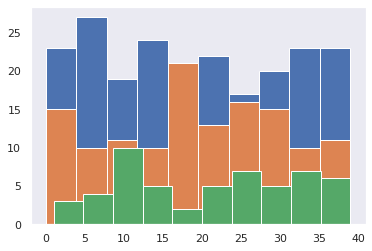

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2, stratify=None)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=2, stratify=None)

plt.hist(y_train)
plt.hist(y_test)
plt.hist(y_valid);

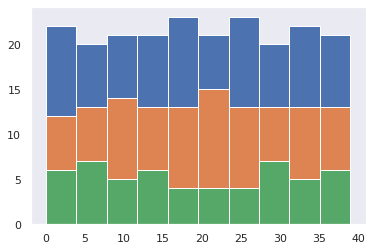

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=2, stratify=y_train)

plt.hist(y_train)
plt.hist(y_test)
plt.hist(y_valid);

## Run Kmeans with k = {2..40}

In [ ]:
k_values = [k for k in range(2,40)]
X = X_train
sses = []

for k in k_values:
  print(f"K={k}")
  # Randomly select k points as centeroids
  np.random.seed(2)
  centers = np.zeros((k, X.shape[1]))
  for i in range(k):
    centers[i] = X[np.random.randint(0, len(X))]

  # Kmeans Clustering
  kmeans = GHDKmeans(k=k, tol=0.0001, max_iter=150)
  kmeans.fit(X, centers)
  print(f"SSE for k={k} is {kmeans.sse()}")
  sses.append(kmeans.sse())
  print()

K=2
Tolerance reached on iteration 4 ,0.0
SSE for k=2 is 14299.744345906178

K=3
Tolerance reached on iteration 12 ,0.0
SSE for k=3 is 12725.274210626852

K=4
Tolerance reached on iteration 14 ,0.0
SSE for k=4 is 11851.278760596888

K=5
Tolerance reached on iteration 9 ,0.0
SSE for k=5 is 11462.121509153569

K=6
Tolerance reached on iteration 10 ,0.0
SSE for k=6 is 11220.322675986985

K=7
Tolerance reached on iteration 14 ,0.0
SSE for k=7 is 10840.14345831086

K=8
Tolerance reached on iteration 11 ,0.0
SSE for k=8 is 10894.340373165385

K=9
Tolerance reached on iteration 4 ,0.0
SSE for k=9 is 10528.095285551535

K=10
Tolerance reached on iteration 4 ,0.0
SSE for k=10 is 10461.864881113755

K=11
Tolerance reached on iteration 5 ,0.0
SSE for k=11 is 10254.03838912236

K=12
Tolerance reached on iteration 9 ,0.0
SSE for k=12 is 9661.06095627426

K=13
Tolerance reached on iteration 9 ,0.0
SSE for k=13 is 9635.9861457248

K=14
Tolerance reached on iteration 9 ,0.0
SSE for k=14 is 9586.194314

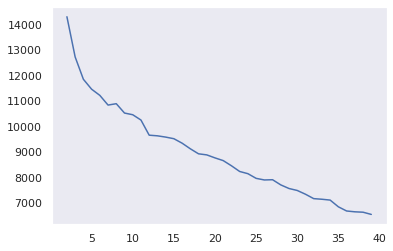

In [ ]:
plt.plot(k_values, sses)

## Compare with Sklearn

In [ ]:
from sklearn.cluster import KMeans

k_values = [k for k in range(2,40)]
X = X_train
sses = []

for k in k_values:
  print(f"K={k}")
  # Randomly select k points as centeroids
  np.random.seed(2)
  centers = np.zeros((k, X.shape[1]))
  for i in range(k):
    centers[i] = X[np.random.randint(0, len(X))]

  # Kmeans Clustering
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  print(f"SSE for k={k} is {kmeans.inertia_}")
  sses.append(kmeans.inertia_)
  print()

K=2
SSE for k=2 is 14299.7421875

K=3
SSE for k=3 is 12721.439453125

K=4
SSE for k=4 is 11845.7890625

K=5
SSE for k=5 is 11328.966796875

K=6
SSE for k=6 is 11024.923828125

K=7
SSE for k=7 is 10666.17578125

K=8
SSE for k=8 is 10386.505859375

K=9
SSE for k=9 is 10124.171875

K=10
SSE for k=10 is 9887.755859375

K=11
SSE for k=11 is 9748.140625

K=12
SSE for k=12 is 9486.21484375

K=13
SSE for k=13 is 9289.1171875

K=14
SSE for k=14 is 9001.69140625

K=15
SSE for k=15 is 8821.400390625

K=16
SSE for k=16 is 8720.970703125

K=17
SSE for k=17 is 8584.724609375

K=18
SSE for k=18 is 8499.43359375

K=19
SSE for k=19 is 8306.783203125

K=20
SSE for k=20 is 8053.1220703125

K=21
SSE for k=21 is 8017.6279296875

K=22
SSE for k=22 is 7767.76806640625

K=23
SSE for k=23 is 7797.15966796875

K=24
SSE for k=24 is 7597.9365234375

K=25
SSE for k=25 is 7459.794921875

K=26
SSE for k=26 is 7336.6767578125

K=27
SSE for k=27 is 7238.9248046875

K=28
SSE for k=28 is 7021.318359375

K=29
SSE for k=2

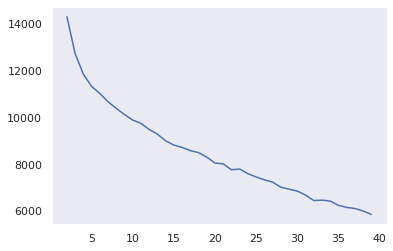

In [ ]:
plt.plot(k_values, sses)

## Elbow method

In [ ]:
!pip install kneed

elbow: 14


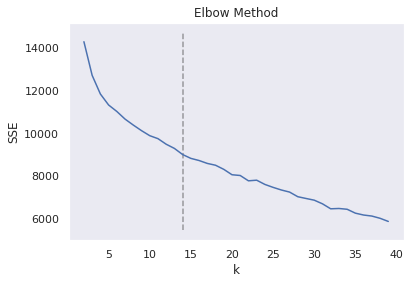

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(k_values, sses, curve='convex', direction='decreasing')
print("elbow:", kn.knee)

plt.plot(k_values, sses);
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',alpha=0.4);
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method");

## Best K=14

In [ ]:
k = 14
# Randomly select k points as centeroids
np.random.seed(2)
centers = np.zeros((k, X.shape[1]))
for i in range(k):
  centers[i] = X[np.random.randint(0, len(X))]

# Kmeans Clustering
kmeans = GHDKmeans(k=k, tol=0.0001, max_iter=150)
kmeans.fit(X, centers)
print(f"SSE for k={k} is {kmeans.sse()}")

Tolerance reached on iteration 9 ,0.0
SSE for k=14 is 9586.19431431013


In [ ]:
labels = kmeans.predict()
labels

array([ 8,  1, 11,  8,  8,  7,  3,  8, 13,  7,  2, 13,  5, 11,  8,  1,  8,
        8,  8,  8,  2,  8,  3,  8, 11,  6,  0,  2,  1,  8,  8,  5,  8,  2,
        8, 11,  6,  9,  2,  9, 11,  7, 10,  4,  2, 11,  8,  1,  2,  7,  2,
       10,  2, 11,  7,  5,  7,  7,  2,  8, 11,  3, 11, 10,  5, 11,  8, 11,
       13,  8,  8,  7,  2,  8,  7, 12, 10,  2,  8,  9,  7,  7, 10,  5,  7,
        8,  8,  5,  8, 10, 11, 10,  8,  0, 10, 11,  8,  2,  8,  2,  8,  7,
        5,  7,  7,  8,  8,  8, 11,  2,  8, 13,  8,  8,  2,  7,  5,  7,  8,
        2, 10,  7, 11,  9, 11, 11,  5, 10,  5, 11,  2,  2,  3,  8,  2, 10,
        8, 11, 11,  7,  8, 11,  7,  6,  8, 10,  8, 11,  7,  6, 13,  2,  6,
        8, 11,  8,  7,  2,  2,  7,  3,  2,  9,  3,  8,  2,  2,  7,  0,  2,
        4,  7,  8, 11,  7,  5,  8,  2,  4,  2, 13,  7, 10,  5, 10,  5,  3,
       11,  5, 10,  1,  7, 11,  8,  5,  2, 11, 11,  7, 11,  2,  2,  7,  3,
        8, 11,  8,  3, 10, 10,  5,  7, 11, 13])

### Predicted Class Histogram

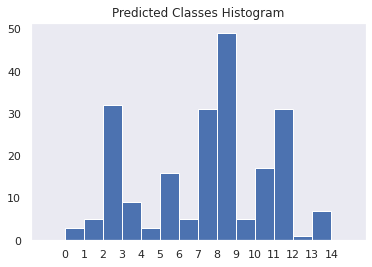

In [ ]:
plt.hist(labels, bins=[i for i in range(-1,16)])
plt.xticks([i for i in range(0,15)])
plt.title("Predicted Classes Histogram");

In [ ]:
lbl, cnt = np.unique(labels, return_counts=True)
lblcnt = zip(lbl, cnt)
for i in lblcnt:
  print(i)

(0, 3)
(1, 5)
(2, 32)
(3, 9)
(4, 3)
(5, 16)
(6, 5)
(7, 31)
(8, 49)
(9, 5)
(10, 17)
(11, 31)
(12, 1)
(13, 7)


### Show Classes
Display a few samples from each class(person)

In [ ]:
def show_class(images, count=5, title=""):
  """Displays the centers as a color palette in kmeans"""
  count = min(len(images), count)
  fig, axs = plt.subplots(1, count, figsize=(count*2,2), constrained_layout=True)
  fig.suptitle(title)
  if count>1:
    for idx, image in enumerate(images[:count]):
      ax = axs[idx]
      ax.set_xticks([])
      ax.set_yticks([])
      ax.imshow(image.reshape(64,64), cmap="gray")
  elif count==1:
    axs.set_xticks([])
    axs.set_yticks([])
    axs.imshow(images[0].reshape(64,64), cmap="gray")
  else:
    print("No Image in this Cluster")
  plt.show()

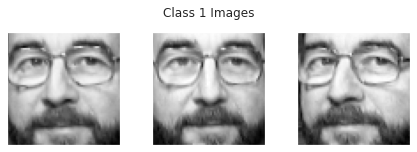

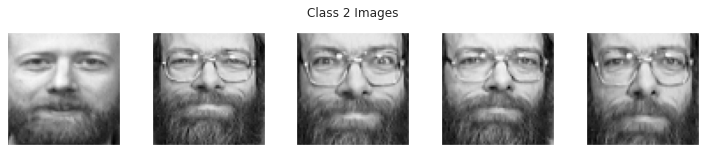

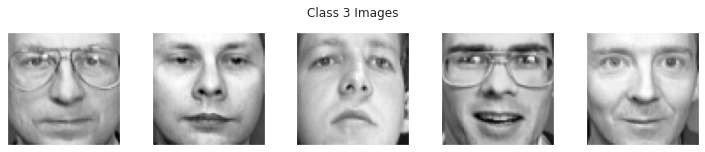

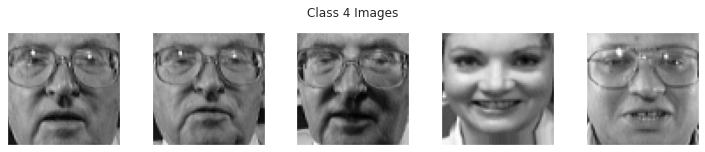

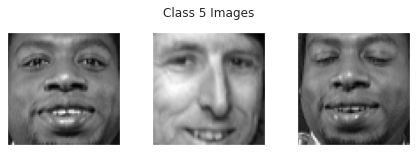

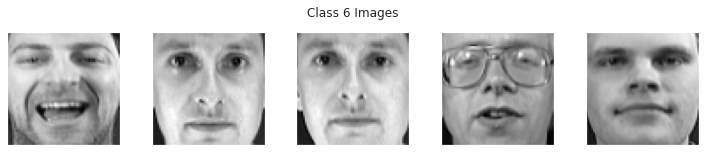

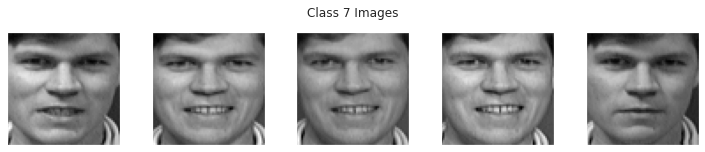

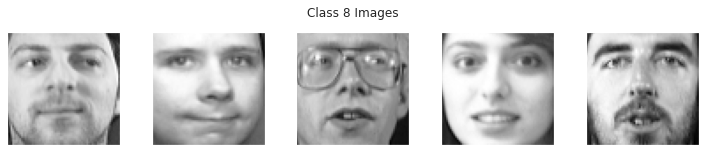

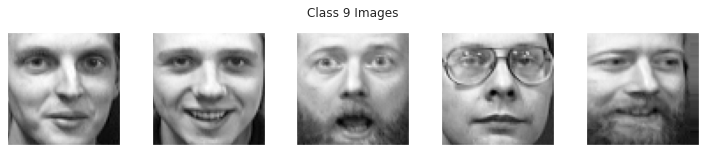

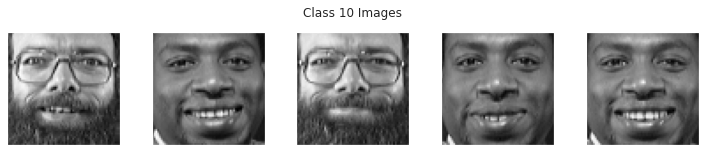

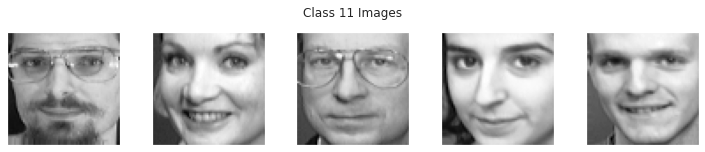

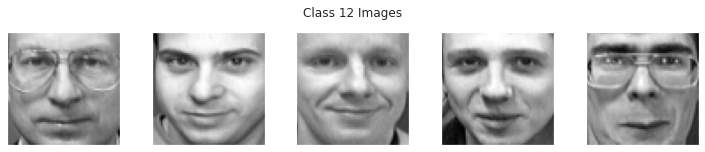

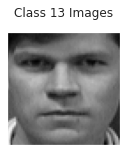

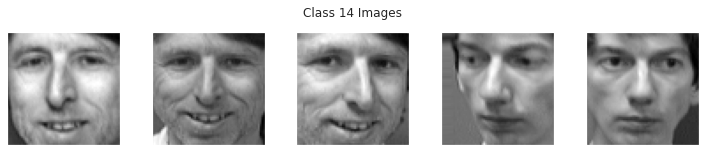

In [ ]:
for i in range(k):
  class_i_images = X_train[labels==i]
  show_class(class_i_images, title=f"Class {i+1} Images")
  print()